<a href="https://colab.research.google.com/github/nivishan-data/whatsapp_aut/blob/main/Demand_Foercast_Polo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/My Drive/DemandForecast'

/content/drive/My Drive/DemandForecast


### Importing Libraries and Dependencies

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = 'Retail_Data_Italy_Other_v2.xlsx'
df = pd.read_excel(file_path)

In [ ]:
df['YearMonth'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['Month'].astype(str), format='%Y-%m')

In [ ]:
df = df.set_index('YearMonth')

In [ ]:
df_polo = df[df['model_definition'] == "92  POLO S/S"]
df_polo = df_polo[df_polo['gender']=='M  Men']

In [ ]:
df_polo.head()

,YEAR,Month,model_definition,gender,sold_qty,returned_qty,net_qty,average_list_price,discount_percentage,order_count,...,no_promo_discount,overall_models,Normal Holidays,Special Holidays,Average Temperature,GA Cost,FA Cost,Is FA Cost,Season,promo_models
YearMonth,,,,,,,,,,,,,,,,,,,,,
2018-01-01,2018,1,92 POLO S/S,M Men,634.0,-23,611.0,51.316829,0.0,333,...,0,50,2,1,5.0,23207.07,0.0,0,Winter,62.0
2018-02-01,2018,2,92 POLO S/S,M Men,679.0,-81,598.0,43.546228,0.0,286,...,0,85,0,0,8.0,21957.24,0.0,0,Winter,79.0
2018-03-01,2018,3,92 POLO S/S,M Men,2193.0,-161,2032.0,48.370546,0.0,263,...,0,165,0,0,12.0,24487.49,0.0,0,Autumn,195.0
2018-04-01,2018,4,92 POLO S/S,M Men,4756.0,-284,4472.0,50.885813,0.0,325,...,0,237,1,0,15.0,43434.17,0.0,0,Spring,309.0
2018-05-01,2018,5,92 POLO S/S,M Men,8389.0,-448,7941.0,52.051500,0.0,549,...,0,252,1,0,20.0,17315.50,0.0,0,Spring,413.0


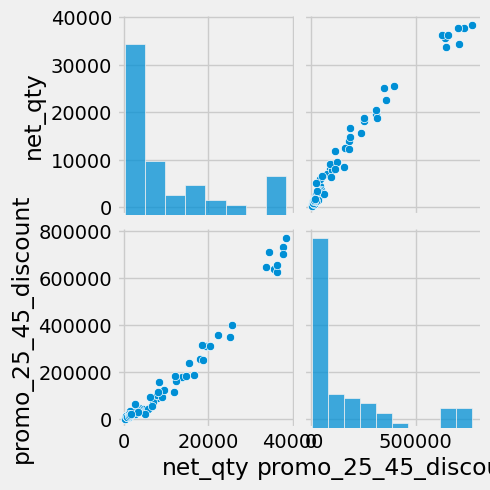

In [ ]:
sns.pairplot(df_polo[['net_qty',  'promo_25_45_discount']])
plt.show()

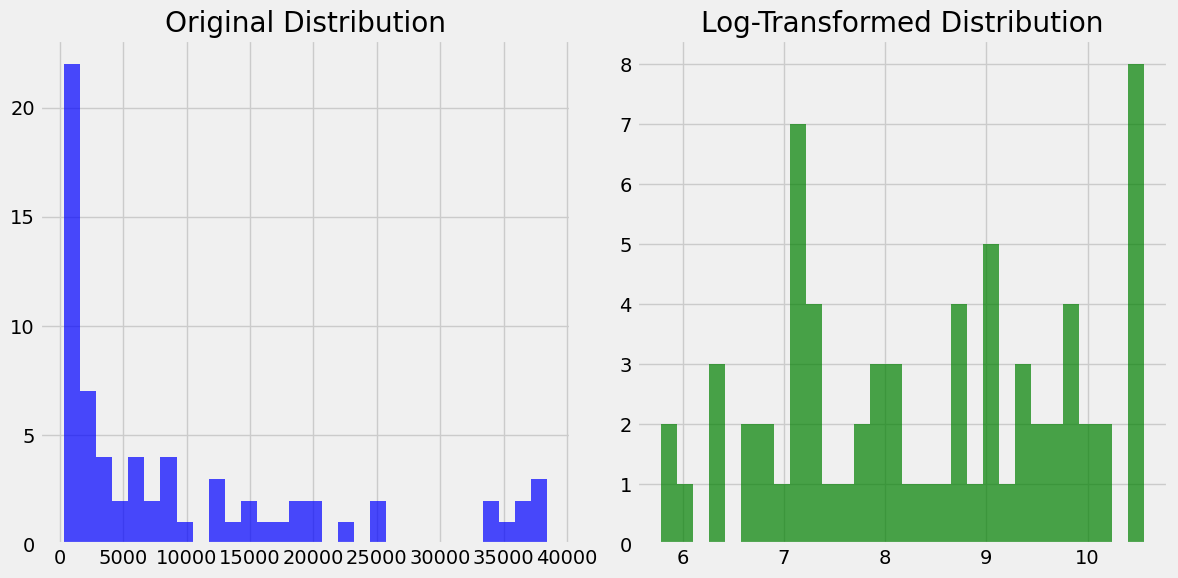

In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame df_polo with a "net_qty" column
# Apply a logarithm transformation to reduce skewness
df_polo["log_net_qty"] = np.log1p(df_polo["net_qty"])

# You can also plot the histogram to check the skewness reduction
import matplotlib.pyplot as plt

# Plot the original "net_qty" distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Distribution")
plt.hist(df_polo["net_qty"], bins=30, color='blue', alpha=0.7)

# Plot the log-transformed "log_net_qty" distribution
plt.subplot(1, 2, 2)
plt.title("Log-Transformed Distribution")
plt.hist(df_polo["log_net_qty"], bins=30, color='green', alpha=0.7)

plt.tight_layout()
plt.show()

In [ ]:
from scipy.stats import skew

skewness = skew(df_polo['net_qty'])

print(f"Skewness of the data: {skewness}")

Skewness of the data: 1.2689790628094315


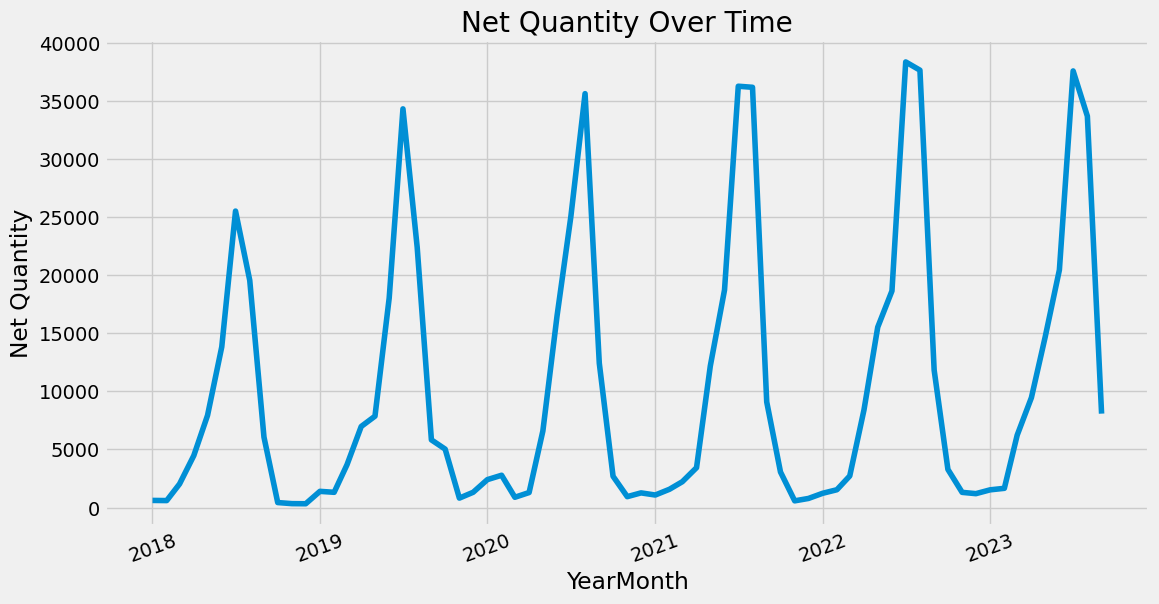

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='net_qty', data=df_polo)
plt.title('Net Quantity Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Net Quantity')
plt.xticks(rotation=20)
plt.show()

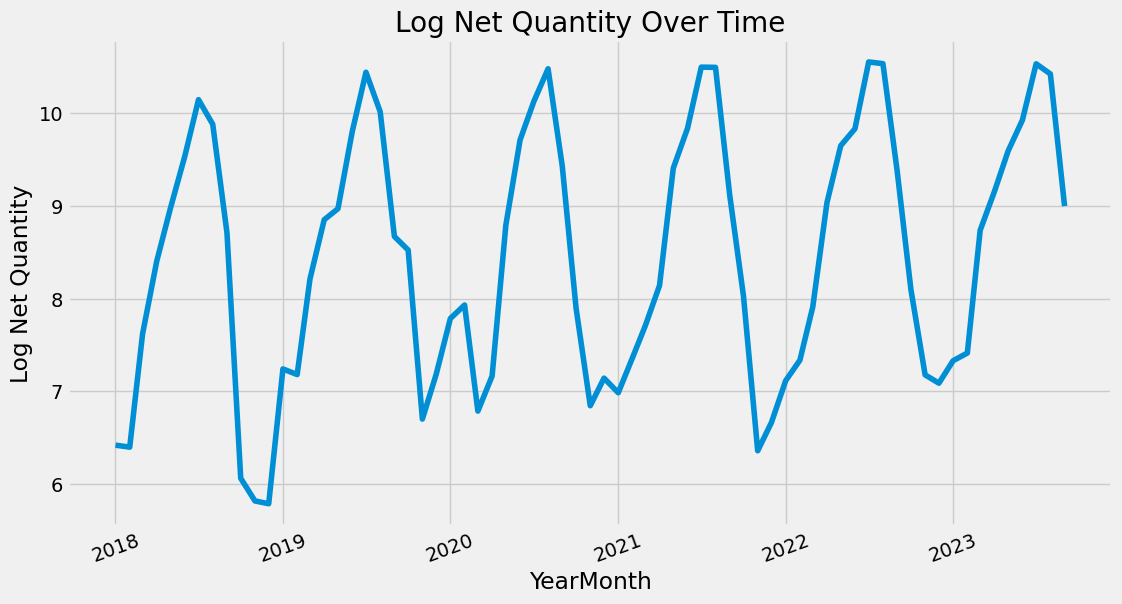

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='log_net_qty', data=df_polo)
plt.title('Log Net Quantity Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Log Net Quantity')
plt.xticks(rotation=20)
plt.show()

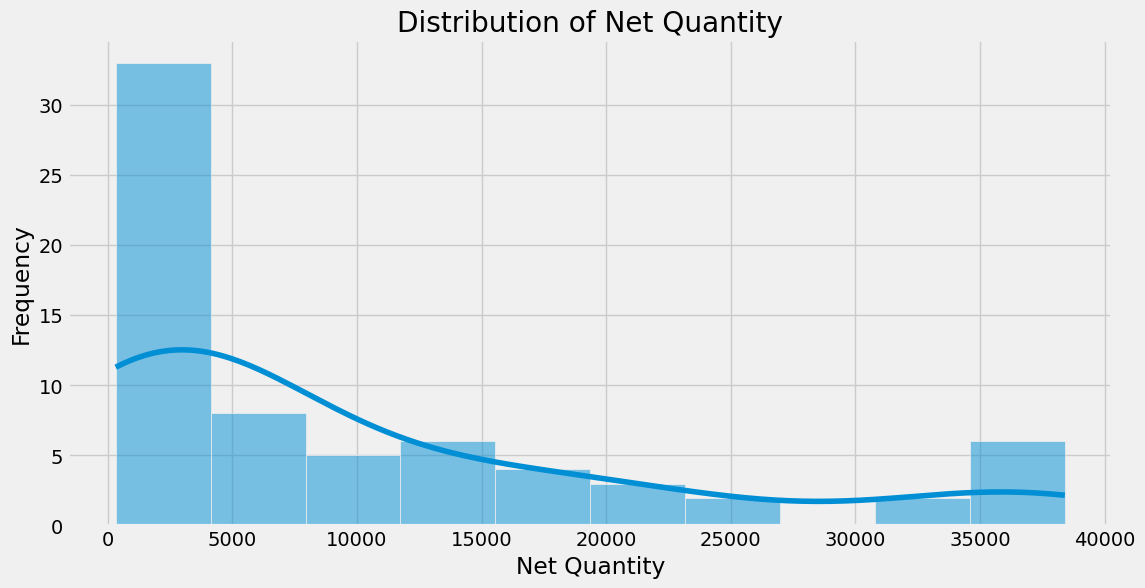

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_polo['net_qty'], bins=10, kde=True)
plt.title('Distribution of Net Quantity')
plt.xlabel('Net Quantity')
plt.ylabel('Frequency')
plt.show()

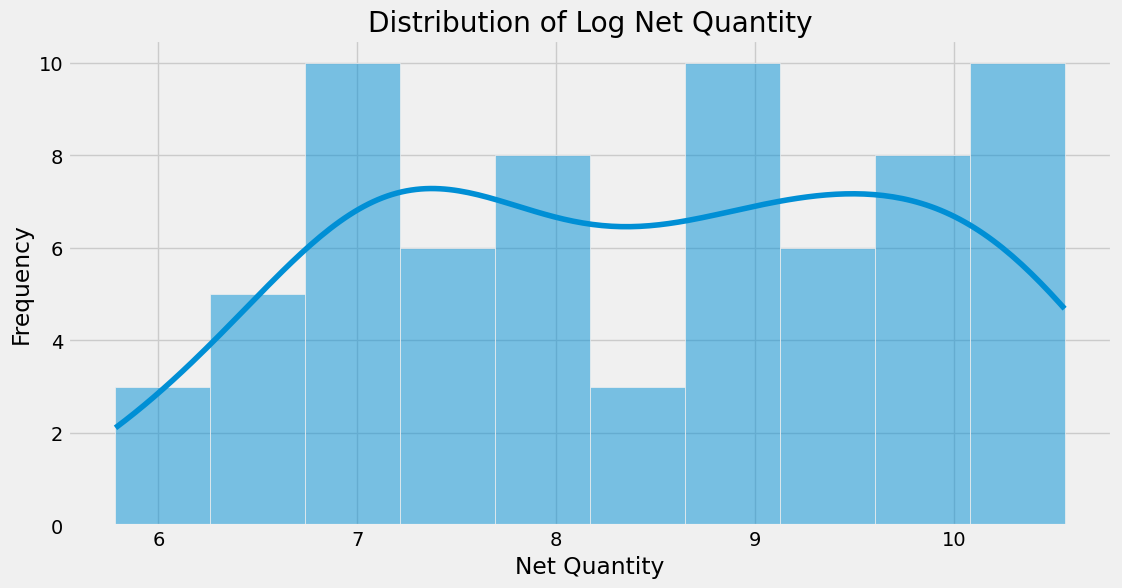

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df_polo['log_net_qty'], bins=10, kde=True)
plt.title('Distribution of Log Net Quantity')
plt.xlabel('Net Quantity')
plt.ylabel('Frequency')
plt.show()

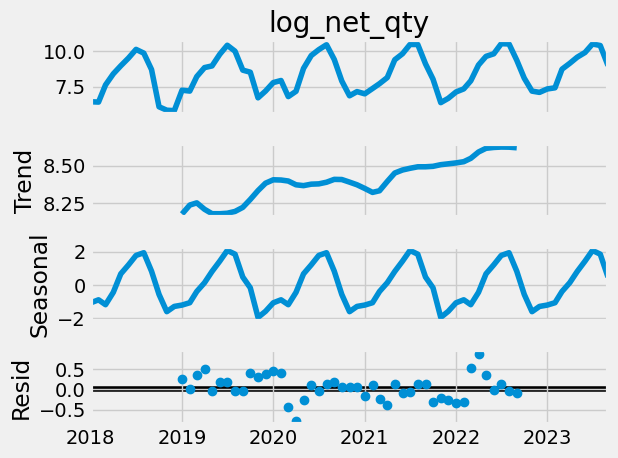

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series
result = seasonal_decompose(df_polo['log_net_qty'], model='additive', period=24)  # Adjust period as needed
result.plot()
plt.show()

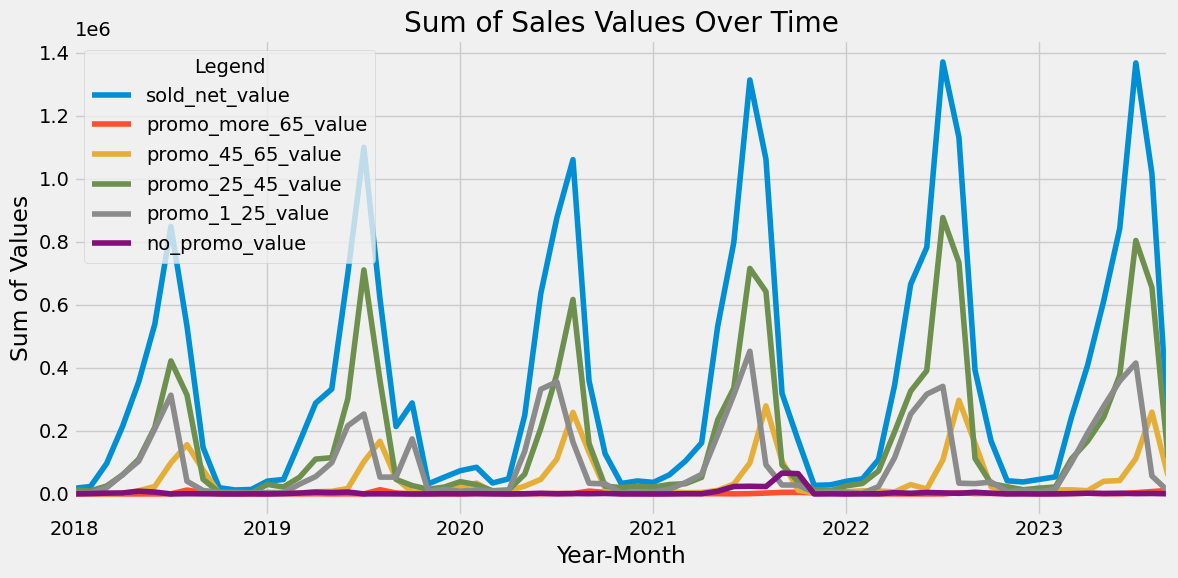

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'YearMonth' is in the format 'YYYY-MM', you can parse it to datetime
df_chart = df_polo.copy()

# Select the columns you want to sum
columns_to_sum = [ 'sold_net_value', 'promo_more_65_value', 'promo_45_65_value', 'promo_25_45_value', 'promo_1_25_value', 'no_promo_value']

# Create a new DataFrame with only the selected columns
df_selected = df_chart[columns_to_sum]

# Group the data by 'YearMonth' and sum the values
df_grouped = df_selected.groupby('YearMonth').sum()

# Plot the data
plt.figure(figsize=(12, 6))
df_grouped.plot(kind='line', ax=plt.gca())

# Customize the plot
plt.xlabel('Year-Month')
plt.ylabel('Sum of Values')
plt.title('Sum of Sales Values Over Time')
plt.legend(title='Legend')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
df_polo.columns

Index(['YEAR', 'Month', 'model_definition', 'gender', 'sold_qty',
       'returned_qty', 'net_qty', 'average_list_price', 'discount_percentage',
       'order_count', 'net_orders', 'sold_net_value', 'promo_more_65_models',
       'promo_45_65_models', 'promo_25_45_models', 'promo_1_25_models',
       'no_promo_models', 'promo_more_65_qty', 'promo_45_65_qty',
       'promo_25_45_qty', 'promo_1_25_qty', 'no_promo_qty',
       'promo_more_65_value', 'promo_45_65_value', 'promo_25_45_value',
       'promo_1_25_value', 'no_promo_value', 'promo_more_65_discount',
       'promo_45_65_discount', 'promo_25_45_discount', 'promo_1_25_discount',
       'no_promo_discount', 'overall_models', 'Normal Holidays',
       'Special Holidays', 'Average Temperature', 'GA Cost', 'FA Cost',
       'Is FA Cost', 'Season', 'promo_models', 'log_net_qty'],
      dtype='object')

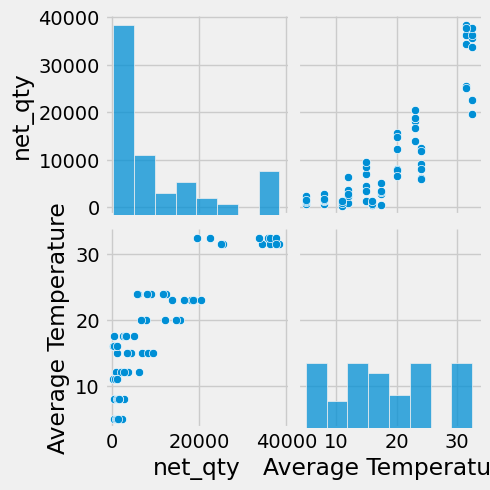

In [ ]:
sns.pairplot(df_polo[['net_qty',  'Average Temperature']])
plt.show()

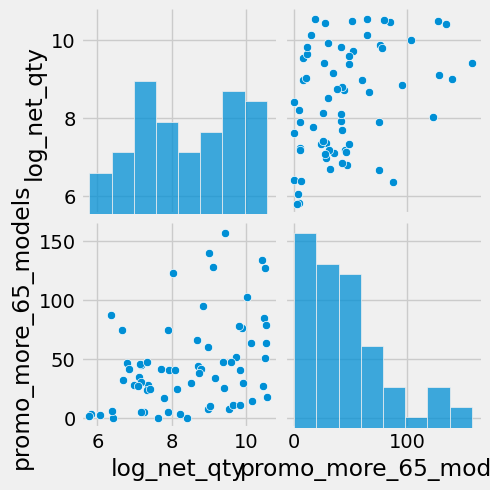

In [ ]:
sns.pairplot(df_polo[['log_net_qty',  'promo_more_65_models']])
plt.show()

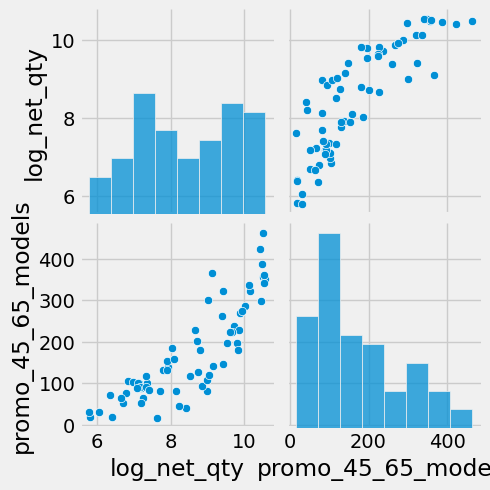

In [ ]:
sns.pairplot(df_polo[['log_net_qty',  'promo_45_65_models']])
plt.show()

In [ ]:
sns.pairplot(df_polo[['log_net_qty',  'promo_25_45_models']])
plt.show()

In [ ]:
sns.pairplot(df_polo[['log_net_qty',  'promo_1_25_models']])
plt.show()

In [ ]:
sns.pairplot(df_polo[['log_net_qty',  'no_promo_models']])
plt.show()

In [ ]:
sns.pairplot(df_polo[['net_qty',  'average_list_price']])
plt.show()

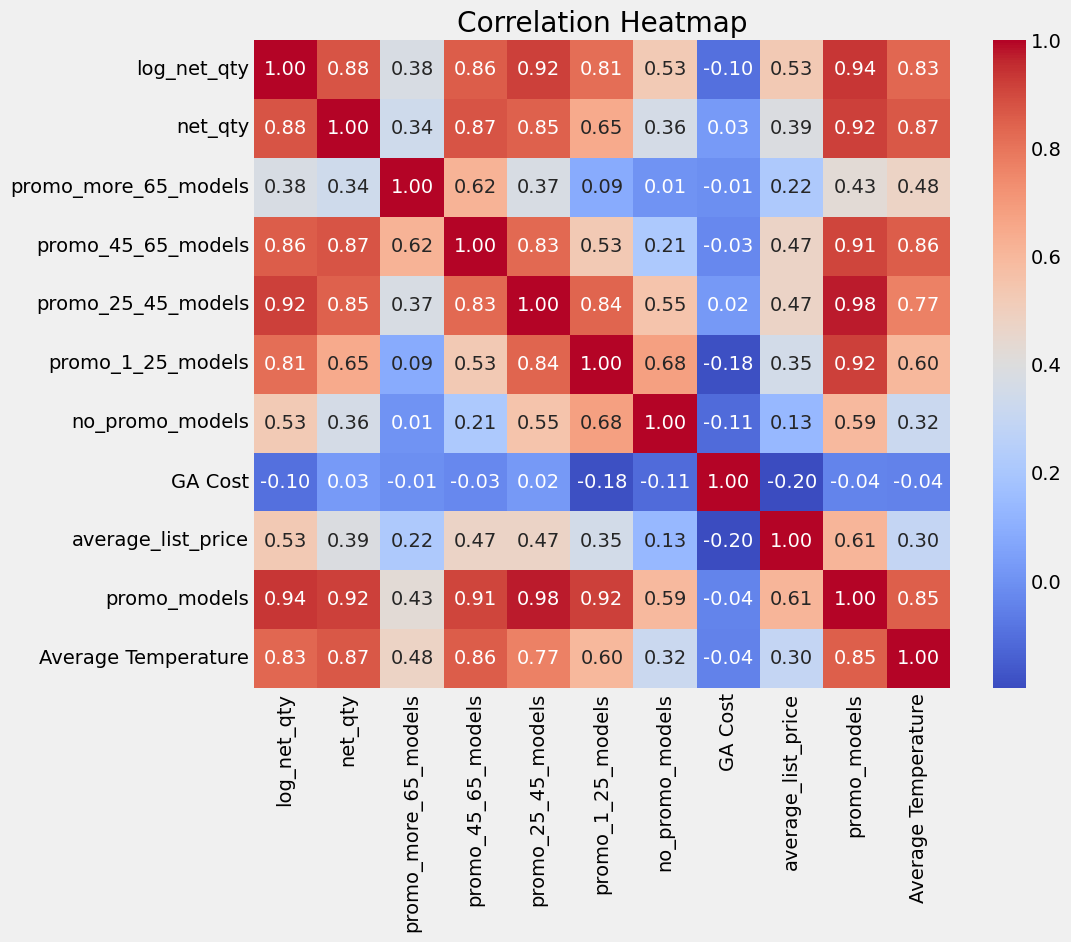

In [ ]:
correlation_matrix = df_polo[['log_net_qty','net_qty' , 'promo_more_65_models',
'promo_45_65_models',
'promo_25_45_models',
'promo_1_25_models',
'no_promo_models', 'GA Cost','average_list_price','promo_models','Average Temperature'

]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## **Model Creation**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
def create_features(df_plt):
    """
    Create time series features based on time series index.
    """
    df_plt = df_plt.copy()
    df_plt['quarter'] = df_plt.index.quarter
    df_plt['month'] = df_plt.index.month
    df_plt['year'] = df_plt.index.year
    return df_plt

df_plt = create_features(df_polo)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a DataFrame df with a "Season" column
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the "Season" column
df_plt["Season_encoded"] = label_encoder.fit_transform(df_plt["Season"])

In [ ]:
train = df_plt.loc[df_plt.index < '01-01-2022']
test = df_plt.loc[df_plt.index >= '01-01-2022']

In [ ]:
df_plt['Season_encoded'].head()

YearMonth
2018-01-01    3
2018-02-01    3
2018-03-01    0
2018-04-01    1
2018-05-01    1
Name: Season_encoded, dtype: int64

In [ ]:
train = create_features(train)
test = create_features(test)

'''FEATURES = ['quarter', 'month', 'year', 'Average Temperature','average_list_price','promo_more_65_models',
'promo_45_65_models',
'promo_25_45_models',
'promo_1_25_models'
, 'Normal Holidays', 'Special Holidays','GA Cost',
       'Is FA Cost','Season_encoded']'''

FEATURES = ['quarter', 'month', 'year','average_list_price','promo_models'
, 'Normal Holidays', 'Special Holidays','GA Cost',
       'Is FA Cost','Average Temperature']
TARGET = 'log_net_qty'

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[10:00:12] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:7.80375	validation_1-rmse:8.36322
[100]	validation_0-rmse:3.04581	validation_1-rmse:3.47204
[200]	validation_0-rmse:1.24608	validation_1-rmse:1.55634
[300]	validation_0-rmse:0.56049	validation_1-rmse:0.78267
[400]	validation_0-rmse:0.29810	validation_1-rmse:0.48310
[500]	validation_0-rmse:0.18647	validation_1-rmse:0.36496
[600]	validation_0-rmse:0.13431	validation_1-rmse:0.33701
[700]	validation_0-rmse:0.09247	validation_1-rmse:0.32049
[800]	validation_0-rmse:0.06927	validation_1-rmse:0.31559
[900]	validation_0-rmse:0.05918	validation_1-rmse:0.31474
[963]	validation_0-rmse:0.05457	validation_1-rmse:0.31468


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

# ... (your code for data preprocessing and model training)

# Predict on the test set
y_pred = reg.predict(X_test)

# Calculate the R-squared value
r_squared = r2_score(y_test, y_pred)

print("R-squared:", r_squared)

R-squared: 0.9349235408283247


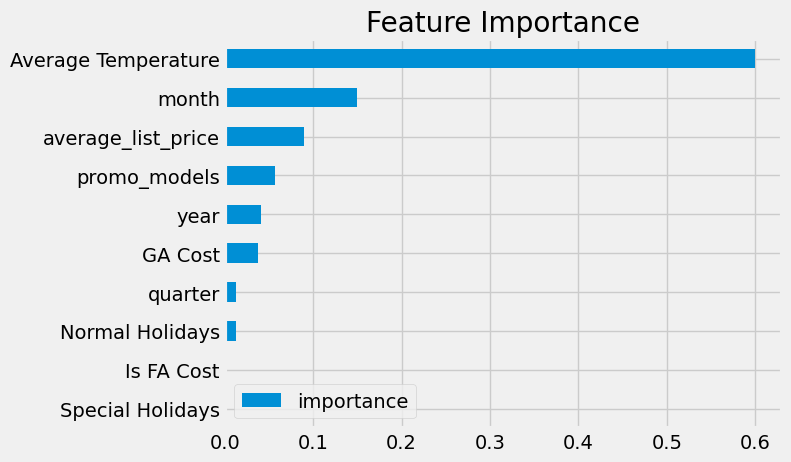

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

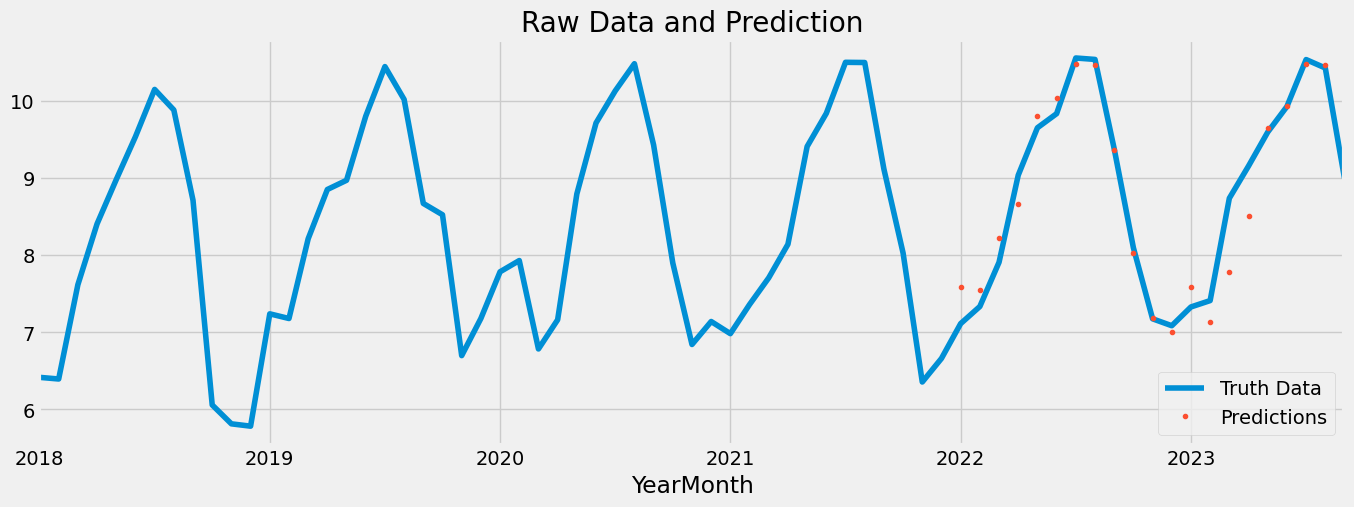

In [ ]:
test['prediction'] = reg.predict(X_test)
df_plt = df_plt.merge(test[['prediction']], how='left', left_index=True, right_index=True)
df_plt['antilog'] = np.expm1(df_plt['prediction'] )
ax = df_plt[['log_net_qty']].plot(figsize=(15, 5))
df_plt['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

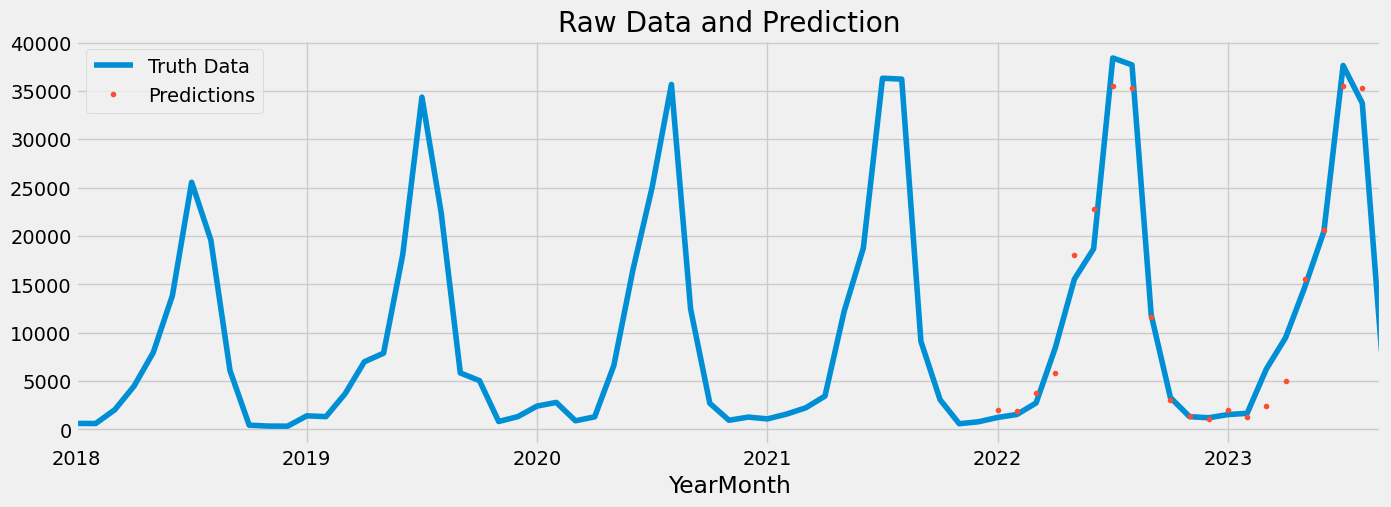

In [ ]:
ax = df_plt[['net_qty']].plot(figsize=(15, 5))
df_plt['antilog'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

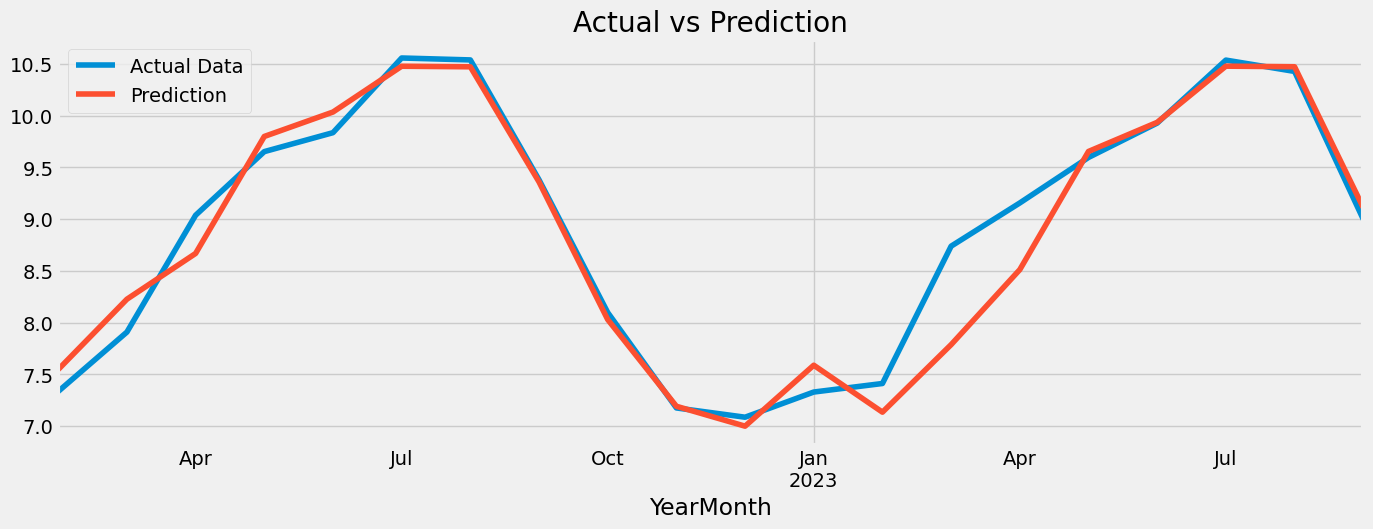

In [ ]:
ax = df_plt.loc[(df_plt.index > '01-01-2022') & (df_plt.index < '01-01-2024')]['log_net_qty'] \
    .plot(figsize=(15, 5), title='Actual vs Prediction')
df_plt.loc[(df_plt.index > '01-01-2022') & (df_plt.index < '01-01-2024')]['prediction'] \
    .plot(style='-')
plt.legend(['Actual Data','Prediction'])
plt.show()

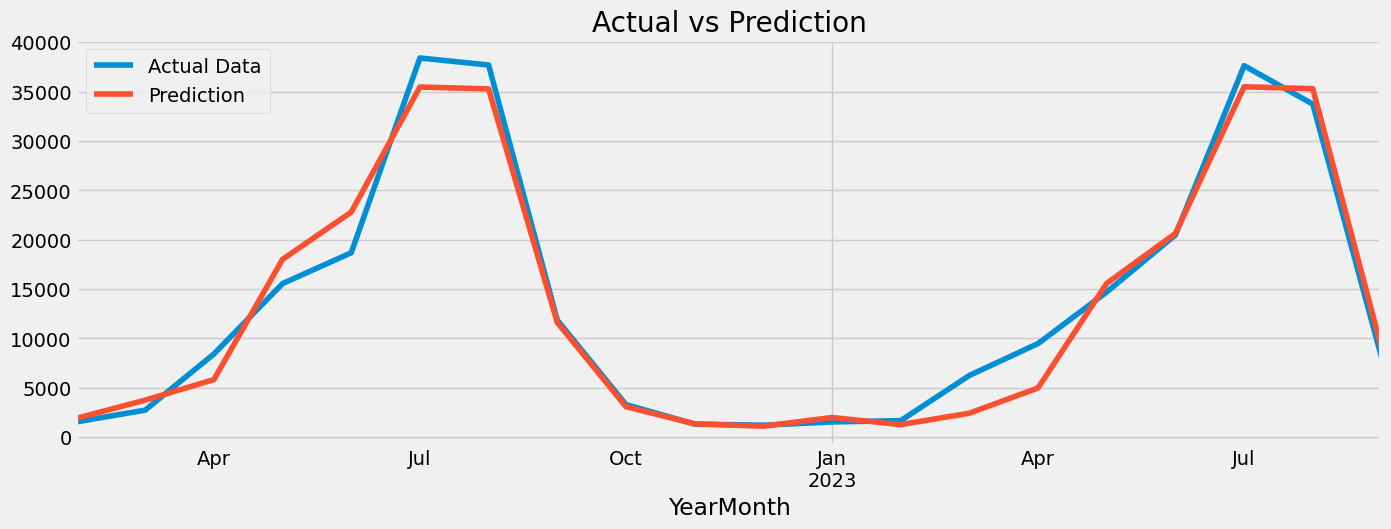

In [ ]:
ax = df_plt.loc[(df_plt.index > '01-01-2022') & (df_plt.index < '01-01-2024')]['net_qty'] \
    .plot(figsize=(15, 5), title='Actual vs Prediction')
df_plt.loc[(df_plt.index > '01-01-2022') & (df_plt.index < '01-01-2024')]['antilog'] \
    .plot(style='-')
plt.legend(['Actual Data','Prediction'])
plt.show()

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(reg)

# Calculate SHAP values for a set of data (e.g., the first 10 rows of your dataset)
shap_values = explainer.shap_values(X_train.iloc[:10, :])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


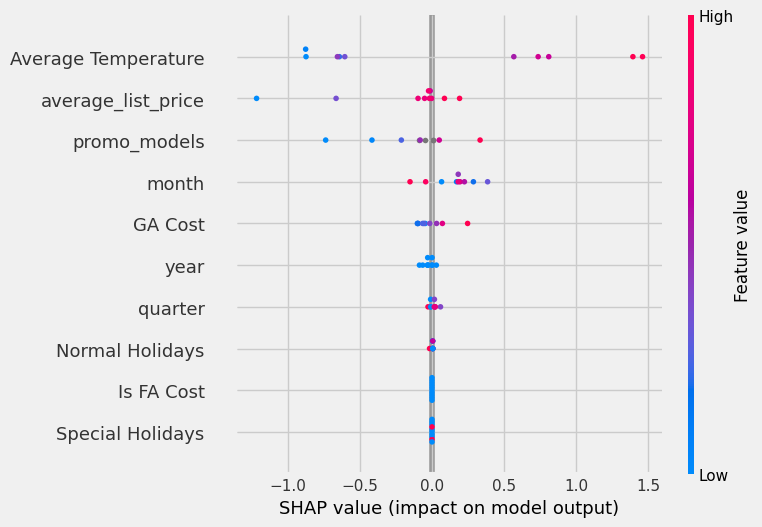

In [ ]:
shap.summary_plot(shap_values, X_train.iloc[:10, :])